In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Uniform Binning

### When to use : - 
#### 1. Uniform Distribution or Normal Distribution

In [3]:
np.random.seed(42)
mean = 50
std_dev = 10
size = 1000
data = np.random.normal(mean,std_dev,size)
df = pd.DataFrame(data,columns=['Age'])

In [4]:
df.head()

,Age
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


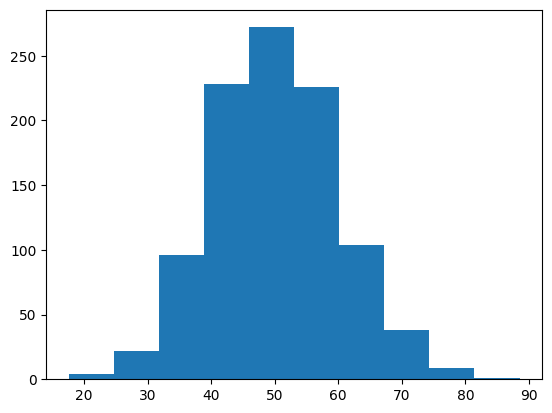

In [5]:
plt.hist(df['Age'])
plt.show()

In [8]:
n = len(df)

In [9]:
k = int(np.ceil(np.log2(n)+1))

In [10]:
print(k)

11


In [13]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=k,encode='ordinal',strategy='uniform')
df['Age_Binned'] = kbins.fit_transform(df[['Age']])

In [14]:
df.head()

,Age,Age_Binned
0,54.967142,5.0
1,48.617357,4.0
2,56.476885,6.0
3,65.230299,7.0
4,47.658466,4.0


<Axes: xlabel='Age_Binned', ylabel='count'>

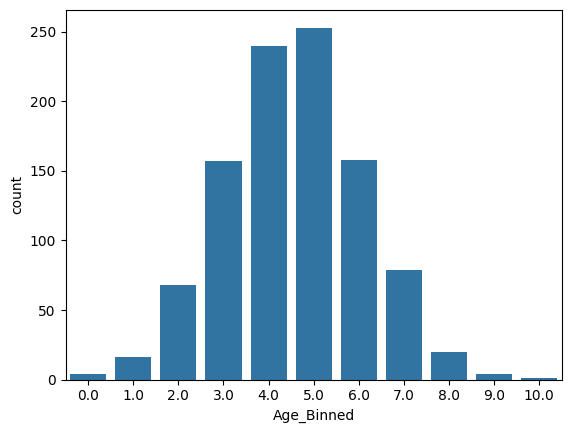

In [16]:
sns.countplot(x=df['Age_Binned'],data=df)

# 2. Quantile Binning 

### When to use : - 
#### 1. skewed Distribution

In [23]:
np.random.seed(42)
data = np.random.randint(1,200,size=20).reshape(-1,1)
df = pd.DataFrame(data,columns=['value'])

In [24]:
df.head()

,value
0,103
1,180
2,93
3,15
4,107


<Axes: xlabel='value', ylabel='count'>

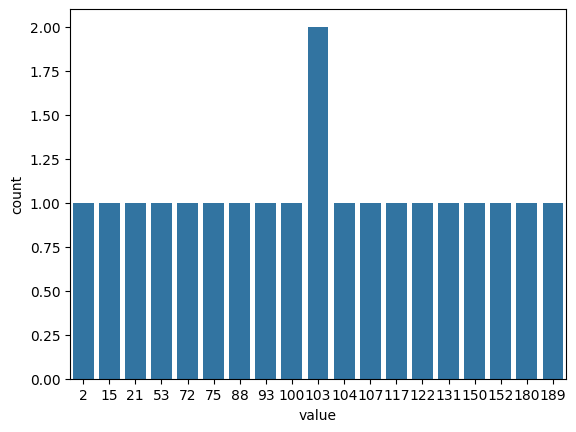

In [25]:
sns.countplot(x=df['value'],data=df)

In [26]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='quantile')
df['Quantile_Binned'] = kbins.fit_transform(df[['value']])

In [27]:
df.head()

,value,Quantile_Binned
0,103,2.0
1,180,3.0
2,93,1.0
3,15,0.0
4,107,2.0


<Axes: xlabel='Quantile_Binned', ylabel='count'>

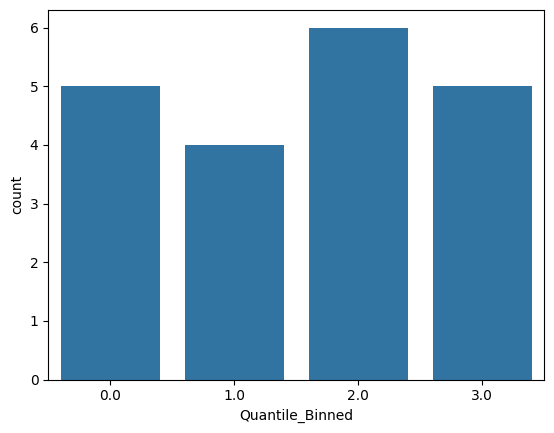

In [28]:
sns.countplot(x=df['Quantile_Binned'],data=df)

# 3. Custom Binning

### When to use : - 
#### 1. Domain knowledge

In [29]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack',
             'Karen', 'Leo', 'Mia', 'Nina', 'Oscar', 'Paul', 'Quinn', 'Rachel', 'Sam', 'Tina',
             'Uma', 'Victor', 'Wendy', 'Xander', 'Yara', 'Zoe', 'Abby', 'Ben', 'Cara', 'Dylan'],
    'Age': [25, 30, 35, 40, 22, 28, 33, 38, 23, 27,
            32, 37, 26, 31, 36, 41, 24, 29, 34, 39,
            21, 45, 50, 55, 60, 65, 70, 75, 80, 85]
}

In [30]:
df = pd.DataFrame(data)

In [32]:
df.head()

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35
3,David,40
4,Eva,22


In [35]:
bins = [0,18,30,40,50,float('inf')]

In [39]:
labels=['0-18','19-30','31-40','41-50','50+']

In [40]:
df['Age_binned'] = pd.cut(df['Age'],bins=bins,labels=labels,right=False)

In [41]:
df.head()

,Name,Age,Age_binned
0,Alice,25,19-30
1,Bob,30,31-40
2,Charlie,35,31-40
3,David,40,41-50
4,Eva,22,19-30


In [42]:
df['Age_binned'].value_counts()

Age_binned
31-40    10
19-30     9
50+       8
41-50     3
0-18      0
Name: count, dtype: int64